# ------------------------------Importing The Libraries---------------------------------------#

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Overview  and Data Cleaning

In [22]:
#Reading the csv file in the dataframe 'data'
df=pd.read_csv('Postures.csv')    

In [3]:
#Checking the shape of the dataset
df.shape

(78096, 38)

In [72]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [4]:
#Checking the first 5 records of the dataset
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


1. We can see some missing values marked as '?' that actually means camera was unabel to detect the marker's coordinate  or that marker was occluded.

2. the first row is seems to have all values as 0

In [5]:
df[0:1].values


array([[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
      dtype=object)

As observed all the values are 0 here So we will drop this row and reset our index.

.

In [23]:
# removing first row

df=df.drop(0)

In [24]:
#resetting index So that we don't get any error during Data Manipulation due to index

df=df.reset_index().drop(columns='index')

In [25]:
#Replacing '?' with np.nan So that we can use some built in function for our Data Manipulation

df=df.replace('?',np.nan)

In [26]:
#Checking data info
df.info()



# Too many object datatype columns are here
#Let's convert them into float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null object
Y3       77405 non-null object
Z3       77405 non-null object
X4       74975 non-null object
Y4       74975 non-null object
Z4       74975 non-null object
X5       65072 non-null object
Y5       65072 non-null object
Z5       65072 non-null object
X6       52247 non-null object
Y6       52247 non-null object
Z6       52247 non-null object
X7       38943 non-null object
Y7       38943 non-null object
Z7       38943 non-null object
X8       30563 non-null object
Y8       30563 non-null object
Z8       30563 n

In [27]:
#Converting the object datatypes to float


df.iloc[:,2:]=df.iloc[:,2:].astype('float64')

In [13]:
#Checking if the datatype conversion succeeded or not
df.info()


# Succeeded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null float64
Y3       77405 non-null float64
Z3       77405 non-null float64
X4       74975 non-null float64
Y4       74975 non-null float64
Z4       74975 non-null float64
X5       65072 non-null float64
Y5       65072 non-null float64
Z5       65072 non-null float64
X6       52247 non-null float64
Y6       52247 non-null float64
Z6       52247 non-null float64
X7       38943 non-null float64
Y7       38943 non-null float64
Z7       38943 non-null float64
X8       30563 non-null float64
Y8       30563 non-null float64

In [28]:
#Checking the dataset again for the above changes made.

df.head()

#Now we can see that our dataset has Null Values or Missing Values instead of '?'
#Also successfully we have dropped that first row which had only 0's

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Checking for null values
df.isnull().sum()

# too many null values

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [30]:
#Now lets check the percentage of missing values once we are sure that our dataset has a large number of missing values

(df.isnull().sum()/len(df))*100



#In the last 12 columns(i.e. 4 markers) we have missing values more than 50%

Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.883539
Y3        0.883539
Z3        0.883539
X4        3.995134
Y4        3.995134
Z4        3.995134
X5       16.675844
Y5       16.675844
Z5       16.675844
X6       33.098150
Y6       33.098150
Z6       33.098150
X7       50.133811
Y7       50.133811
Z7       50.133811
X8       60.864332
Y8       60.864332
Z8       60.864332
X9       69.310455
Y9       69.310455
Z9       69.310455
X10      81.110186
Y10      81.110186
Z10      81.110186
X11      99.960305
Y11      99.960305
Z11      99.960305
dtype: float64

In [32]:
#As of now imputing the missing values with 0 until we come up a with a better idea.
#The markers are occluded from the camera so giving them a 0 value (i.e.asumming that they are at Origin)

data=df.fillna(0)

In [33]:
#Checking for the null values after imputation
data.isnull().sum().sum()

0

# Exploratory Data Analysis

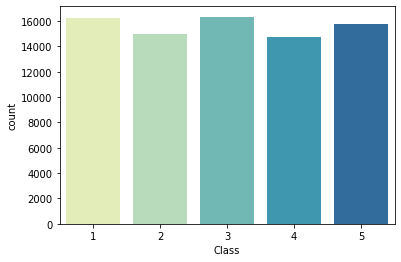

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

In [34]:
# lets check the Class Distribution
sns.countplot(data.Class,palette=sns.color_palette("YlGnBu"))
plt.show()
data.Class.value_counts()



Here the class is our target column and by seeing the below count plot we can say that our target column is balanced.


.

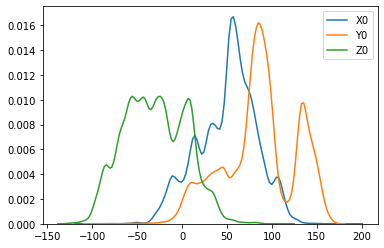

In [35]:
# Distribution of X0,Y0,Z0 using kde plot
sns.kdeplot(data.X0)
sns.kdeplot(data.Y0)
sns.kdeplot(data.Z0)
plt.show()



The X0 feature has values in the middle range i.e. it ranges from -50 to 150.

The Y0 feature has values in the highest range i.e. it ranges from -50 to 200.

The Z0 feature has values in the lowest range i.e. it ranges from -150 to 100.(It has high number of negative values)

We cannot draw inferences here because X0,Y0,Z0 has values that does not represent a single marker but it contains values from different markers. 


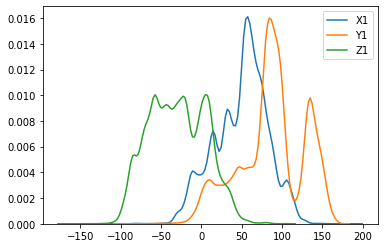

In [224]:
# Distribution of X1,Y1,Z1 using kde plot
sns.kdeplot(data.X1)
sns.kdeplot(data.Y1)
sns.kdeplot(data.Z1)
plt.show()


From the above graph we can conclude that the feautures are not normally distributed.

When compared with the above graph which shows the distribution of X0,Y0,Z0 features we can come to a conclusion that (Xi,Yi,Zi) features are very similar.

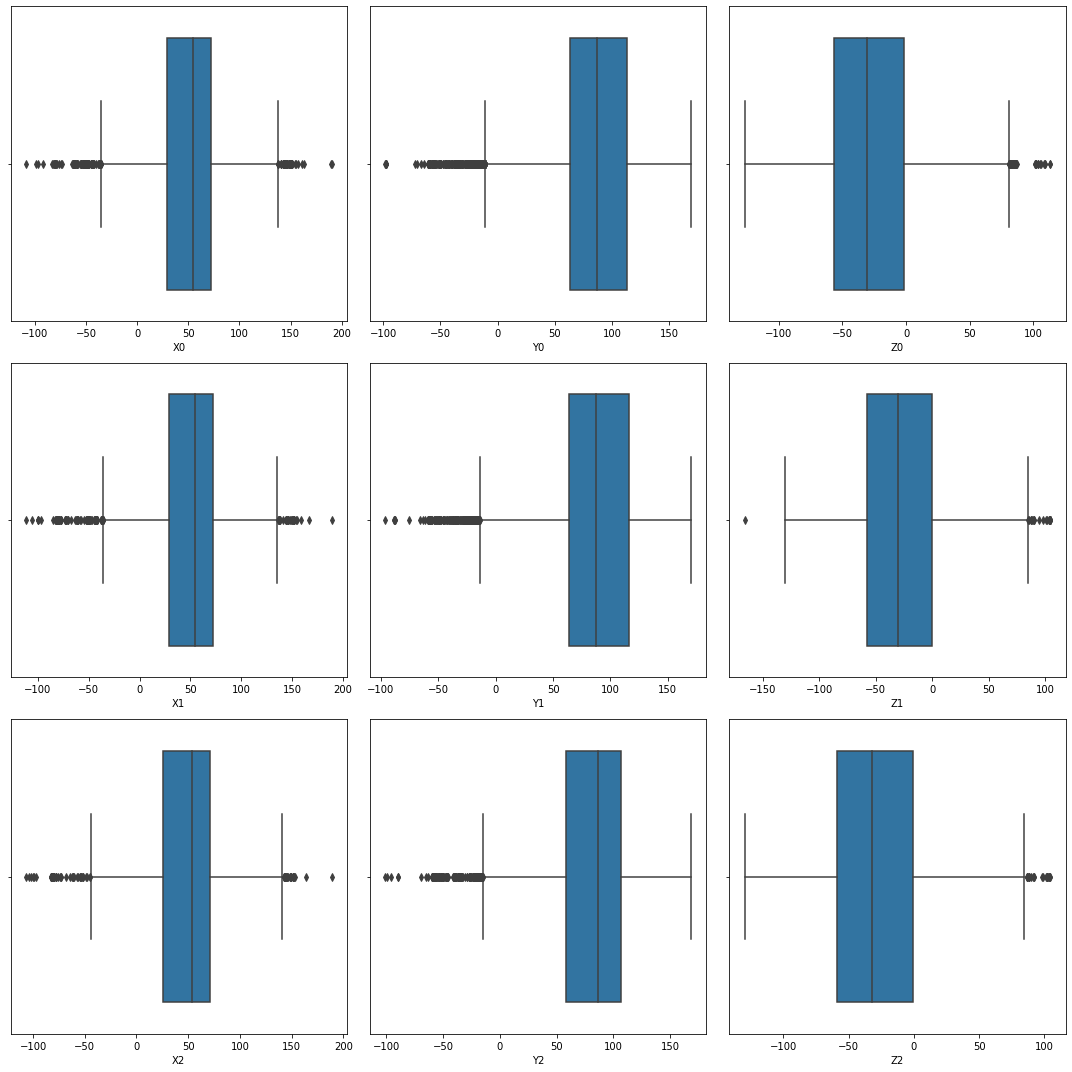

In [41]:
# Distribution of X0,Y0,Z0 using box plot
fig,ax=plt.subplots(3,3,figsize=(15,15))
sns.boxplot(data.X0,ax=ax[0,0])
sns.boxplot(data.Y0,ax=ax[0,1])
sns.boxplot(data.Z0,ax=ax[0,2])
sns.boxplot(data.X1,ax=ax[1,0])
sns.boxplot(data.Y1,ax=ax[1,1])
sns.boxplot(data.Z1,ax=ax[1,2])
sns.boxplot(data.X2,ax=ax[2,0])
sns.boxplot(data.Y2,ax=ax[2,1])
sns.boxplot(data.Z2,ax=ax[2,2])
plt.tight_layout()
plt.show()

As we can see here the Distribution of X0 is more similar to the columns X1 and X2
Also Y0 similar to Y1 and Y2 as well as Z0 similar to Z1 and Z2

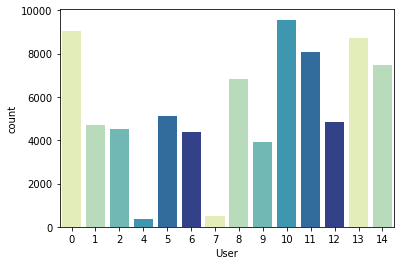

10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: User, dtype: int64

In [38]:
#Distribution of Users using countplot
sns.countplot(data.User,palette=sns.color_palette("YlGnBu"))
plt.show()
data.User.value_counts()

User 7 and 4 have very low values as compared to other users

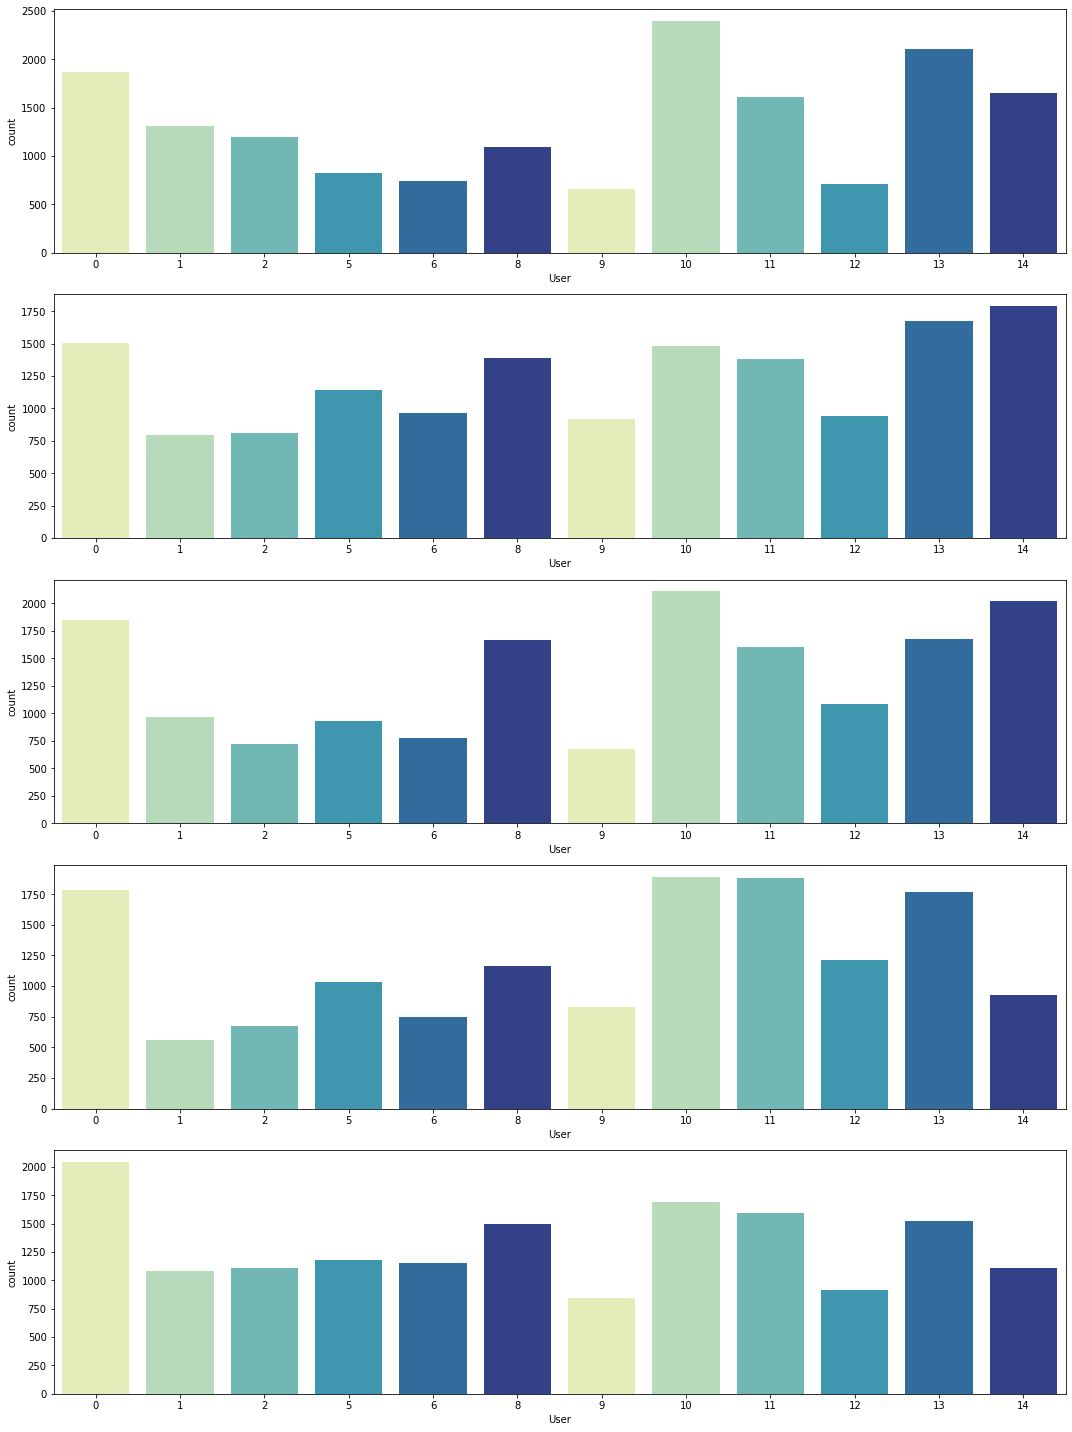

User 0
5    2043
1    1872
3    1851
4    1781
2    1501
Name: Class, dtype: int64
User 1
1    1307
5    1085
3     968
2     796
4     561
Name: Class, dtype: int64
User 2
1    1198
5    1109
2     808
3     721
4     677
Name: Class, dtype: int64
User 5
5    1183
2    1143
4    1033
3     926
1     820
Name: Class, dtype: int64
User 6
5    1154
2     962
3     779
4     744
1     738
Name: Class, dtype: int64
User 8
3    1670
5    1492
2    1392
4    1160
1    1097
Name: Class, dtype: int64
User 9
2    918
5    841
4    832
3    676
1    653
Name: Class, dtype: int64
User 10
1    2397
3    2108
4    1894
5    1693
2    1481
Name: Class, dtype: int64
User 11
4    1881
1    1604
3    1601
5    1595
2    1380
Name: Class, dtype: int64
User 12
4    1212
3    1087
2     941
5     913
1     712
Name: Class, dtype: int64
User 13
1    2107
4    1771
3    1672
2    1671
5    1518
Name: Class, dtype: int64
User 14
3    2020
2    1790
1    1647
5    1107
4     931
Name: Class, dtype: int64


In [68]:
#Class-Wise Distribution of User

fig,ax=plt.subplots(5,1,figsize=(15,20))
sns.countplot(data[data.Class==1].User,ax=ax[0],palette=sns.color_palette("YlGnBu"))
sns.countplot(data[data.Class==2].User,ax=ax[1],palette=sns.color_palette("YlGnBu"))
sns.countplot(data[data.Class==3].User,ax=ax[2],palette=sns.color_palette("YlGnBu"))
sns.countplot(data[data.Class==4].User,ax=ax[3],palette=sns.color_palette("YlGnBu"))
sns.countplot(data[data.Class==5].User,ax=ax[4],palette=sns.color_palette("YlGnBu"))
plt.tight_layout()
plt.show()
for i in data.User.unique():
    print('User',i)
    print(data[data.User==i].Class.value_counts())

1. As it is evident from the subplots above that Users 7 and 4 have only 4 postures namely 1,2,3,4 and 5th posture is missing.

2. Also User 7 and User 4 have very less amount of values as compared to others.

So for now will drop user 7 and 4 

In [36]:
#Dropping User 7 and 4 from the dataframe.
for i in (7,4):
    indexes=data[data.User==i].index
    data=data.drop(indexes)

In [37]:
#Checking the sahpe of dataframe after dropping user 7 and 4
data.shape

(77224, 38)

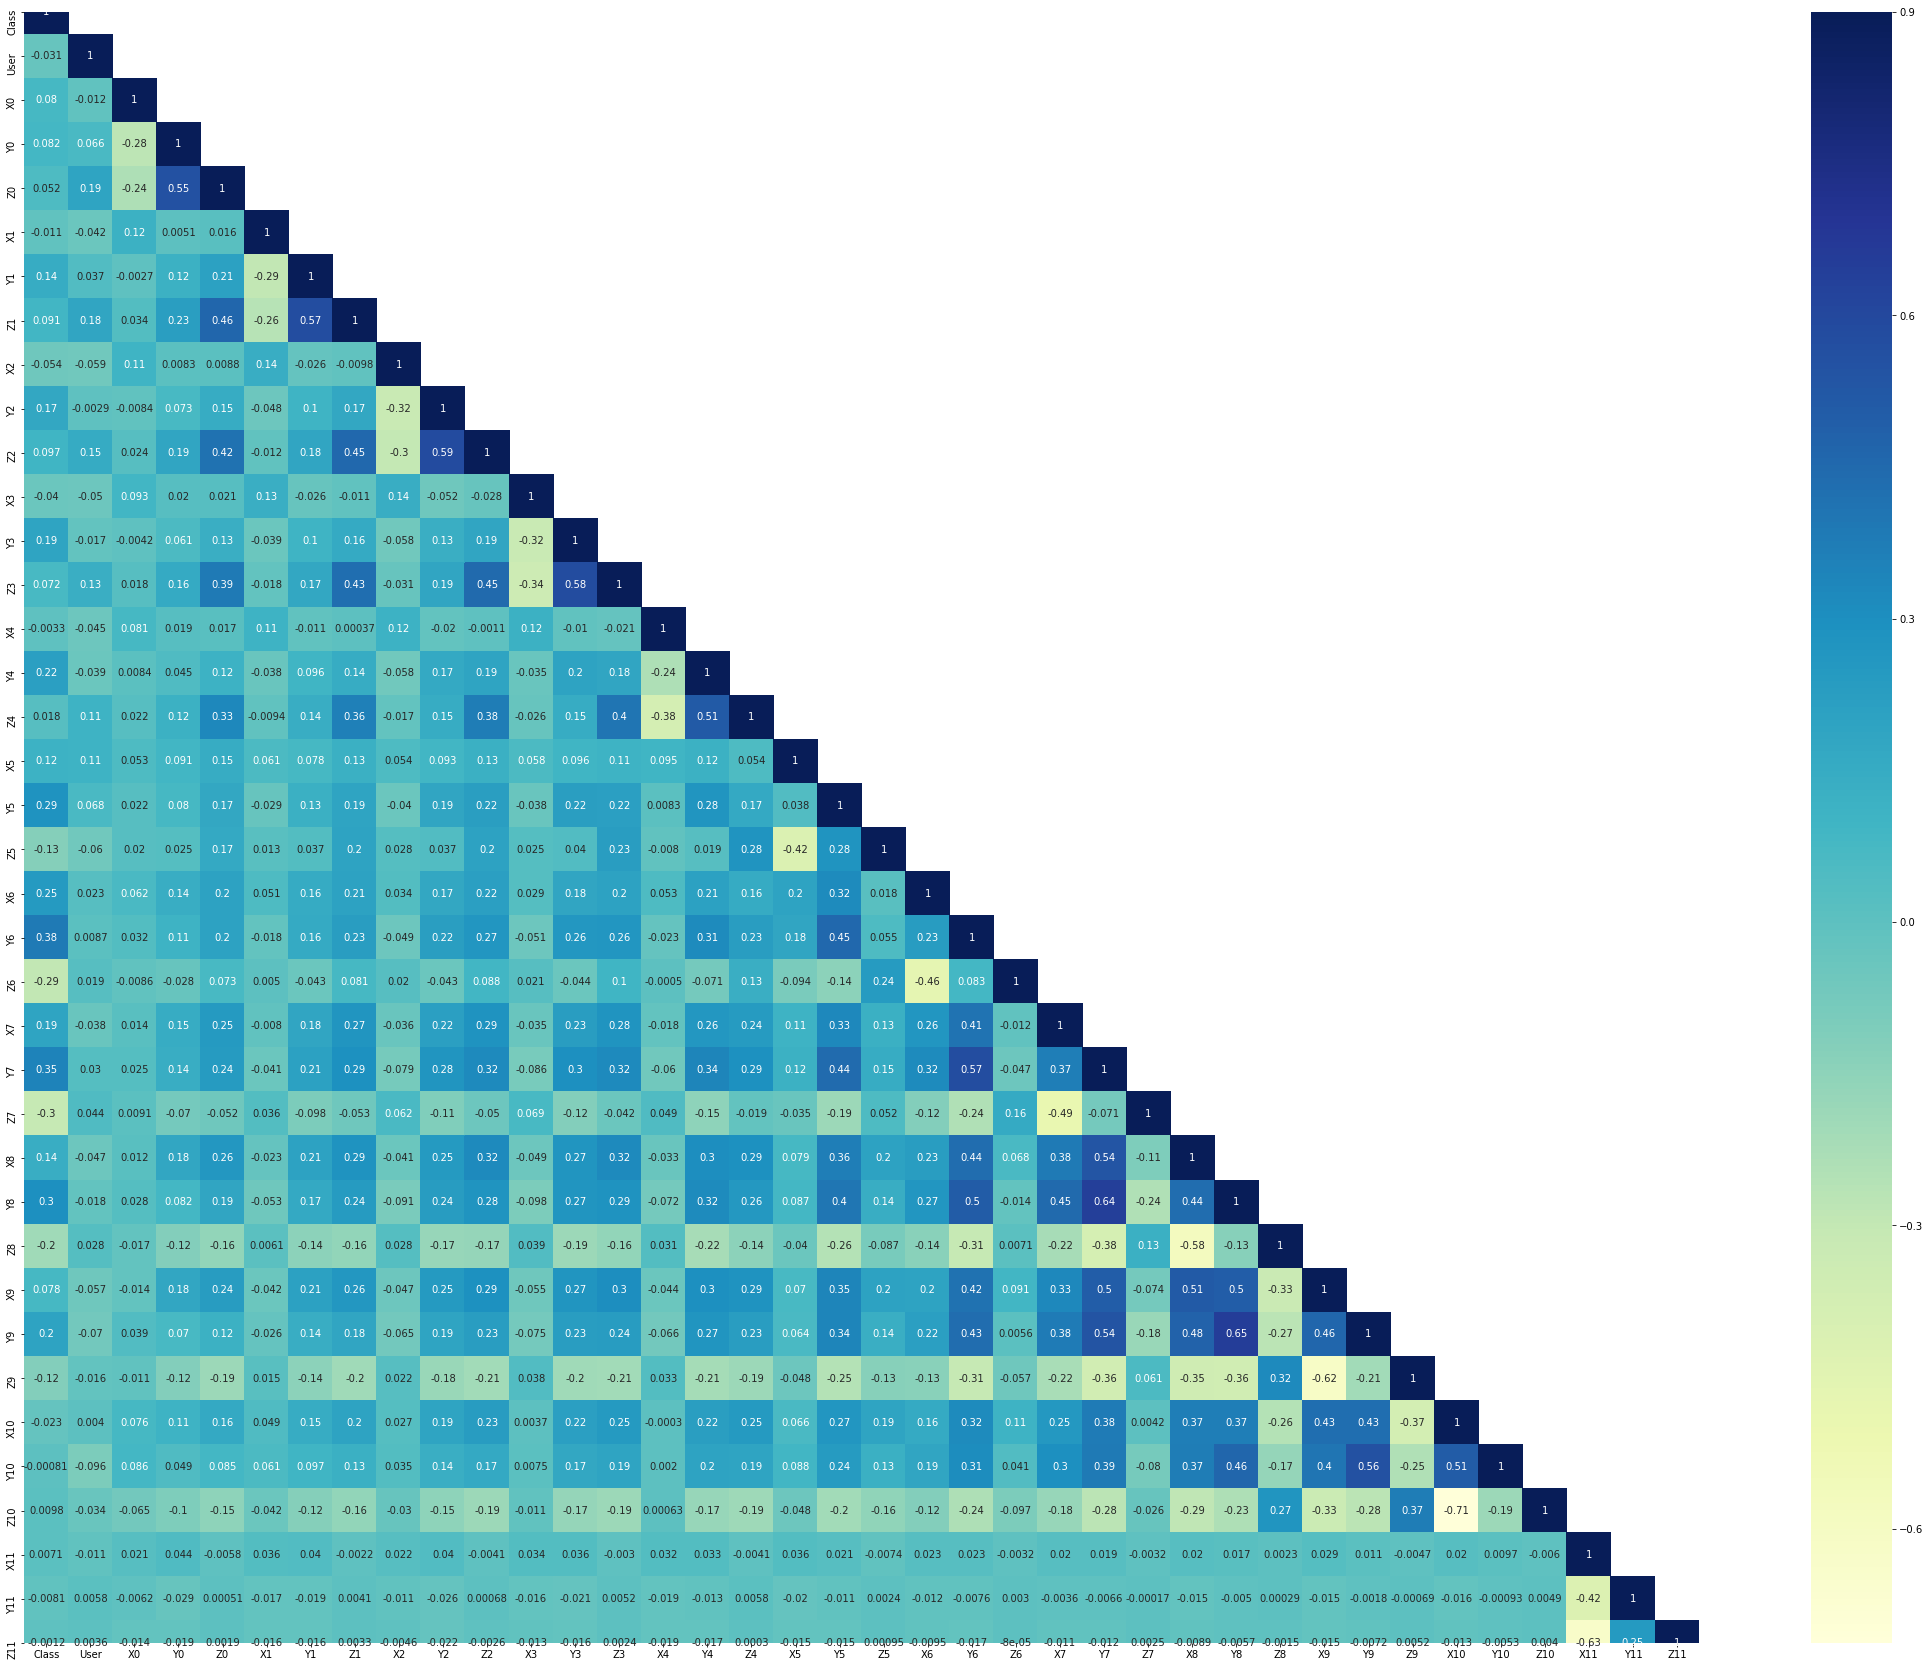

In [62]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(40,30)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

# Selection of a Base Model:

Comparing multiple models is a difficult task here because it is not possible to simply 
choose the model that fits the data best which is why we have decided to go by Occam’s razor's rule of model selection.

Occam’s razor is the principle that states that unnecessarily complex models should not be preferred without checking the results of the simpler ones.In other worlds we should always start with the basic and simpler models first and proceed towards complex models.


1. Multiclass Logistic Regression:

Since Multiclass Logistic Regression is best for numerical and ordered data we can not go further with this model.Here though our data is numerical but it is unordered in nature.

2. Decision Tree Classifier: 

As per our understanding, our data will show true accuracies when model applied is Decision Tree as this model takes into account both numerical and unordered data efficiently.

In [53]:
#building a base model
from sklearn.metrics import f1_score ,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [39]:
X=data.drop(columns=['User','Class'],axis=1)
y=data['Class']

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [42]:
base_model=DecisionTreeClassifier()

In [43]:
#fitting
base_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_pred=base_model.predict(X_test)

In [71]:
kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
Cross_val_score = cross_val_score(base_model, X, y,cv=kfold,scoring='f1_weighted')
mean_cross_val_score=np.mean(Cross_val_score)

In [72]:
print( 'Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print('mean_cross_val_score:',mean_cross_val_score)

Accuracy: 0.9624987050657826
F1 score: 0.9624867926412745
mean_cross_val_score: 0.9669661819224228


Since f1_score is too high , it indicates that this is not a authentic metric to train the model. 
So we have created our own metric using One-User-Out Basis.

In [81]:
#We have created a function that splits the data into train and test using One-User-Out Basis.
def cal_score(data,model):
    from sklearn.metrics import f1_score
    user=data.User.unique()
    mean_score=[]
    for i in user:
        X_train=data[data.User!=i].drop(columns=['User','Class'])
        y_train=data[data.User!=i].Class
        X_test=data[data.User==i].drop(columns=['User','Class'])
        y_test=data[data.User==i].Class
        model.fit(X_train,y_train)
        score=f1_score(y_test,model.predict(X_test),average='weighted')
        mean_score.append(score)
        s=np.mean()
    return(mean_score)

In [82]:
cal_score(data,base_model)

[0.6385573150031165,
 0.7615572942870122,
 0.7958434608399589,
 0.416013707332162,
 0.7234729065173559,
 0.761957187421042,
 0.6058570412359463,
 0.7757827623532618,
 0.4967402497896622,
 0.7913466228221981,
 0.8305401559048363,
 0.6046838687270635]